In [2]:
import cv2

In [3]:
# face emotion recoginition


In [4]:
im=cv2.imread('OIP.jpeg')
from deepface import DeepFace



25-03-13 21:10:26 - Directory C:\Users\madhava reddy\.deepface has been created
25-03-13 21:10:26 - Directory C:\Users\madhava reddy\.deepface\weights has been created


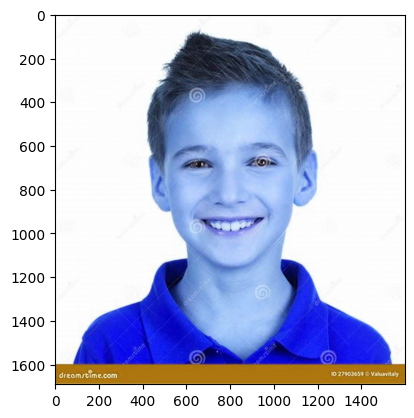

In [5]:
import matplotlib.pyplot as plt
plt.imshow(im) #based on bgr

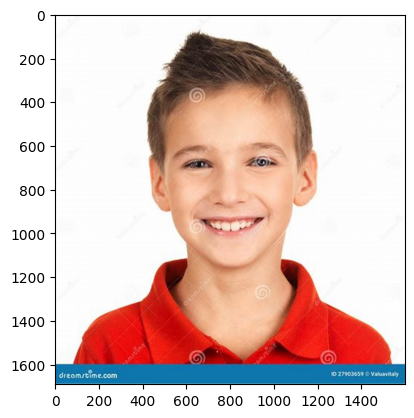

In [6]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [8]:
predictions = DeepFace.analyze(img_path=im, actions=['emotion'])

In [9]:
predictions
type(predictions)

list

In [10]:
predictions[0]['dominant_emotion']

'happy'

In [11]:
#cascade classifer for face rectangle across the face
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [12]:
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

In [13]:
faces=faceCascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)

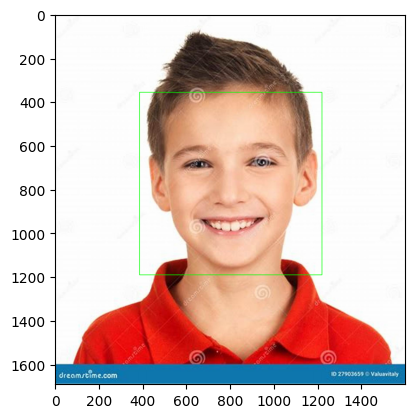

In [14]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [15]:
cv2.putText(im,predictions[0]['dominant_emotion'],(0,50),cv2.FONT_HERSHEY_SIMPLEX,3,(0,0,255),1,cv2.LINE_AA)

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[174, 134,  52],
        [172, 132,  50],
        [170, 130,  48],
        ...,
        [178, 129,  55],
        [181, 132,  58],
        [183, 134,  60]],

       [[161, 127,  57],
        [160, 126,  56],
        [158, 124,  54],
        ...,
        [166, 123,  60],
        [169, 125,  64],
        [171, 127,  66]],

       [[255, 255, 206],
        [255, 255, 206],
        [255, 255, 206],
        ...,
        [255, 255, 210],
        [255, 255, 212],
        [255, 255, 212]]

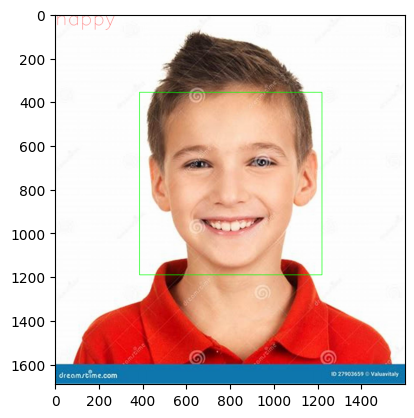

In [16]:
plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

In [23]:
import cv2
from deepface import DeepFace

# Load OpenCV's face detector
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    if not ret:
        break  # If no frame is captured, exit the loop

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Analyze emotions only if a face is detected
    if len(faces) > 0:
        try:
            result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)

            # Extract dominant emotion
            dominant_emotion = result[0]['dominant_emotion'] if isinstance(result, list) else result['dominant_emotion']
        except Exception as e:
            dominant_emotion = "Unknown"  # Default in case of an error

        # Draw rectangles around detected faces and display emotion
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, dominant_emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the video frame
    cv2.imshow("Emotion Detection", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
